In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import geopandas as gpd
import branca


%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/2020-tokyo-paralympics/paralympic-medal-tally.csv")
df.head().T

In [ ]:
#Ref=https://www.kaggle.com/joshuaswords/does-hosting-the-olympics-improve-performance
df = pd.read_csv("/kaggle/input/2020-tokyo-paralympics/paralympic-medal-tally.csv")
def highlight(nation):
    if nation['Country'] == 'Japan':
        return ['background-color: #f3f2f1']*6
    else:
        return ['background-color: white']*6

df[['Rank','Country','Bronze','Silver','Gold','Total']].iloc[:15].style.set_caption('Paralympics Top 15 Countries')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\
.hide_index().apply(highlight, axis=1)

**Obervatrions:**

Paralympics Host country Japan has the 11th rank and less number of medals as compared to other countries.

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum()

Data contains no null values and it is ready for the analysis

In [ ]:
df.describe()

### EDA

In [ ]:
# Histogram 
fig , axis = plt.subplots(figsize=(20,5))
sns.histplot(df["Total"]);

**Observations:**

1. The most number of Medals got by a country is in range between 0 - 20


In [ ]:
#kernel density estimation Plot
fig , axis = plt.subplots(figsize=(20,8))
sns.kdeplot(df["Total"]);

Lets check the Corr of the DataFrame

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
plt.figure(figsize=(20,10),dpi=300)
sns.scatterplot(x='Total',y='Country',hue='Country',data=df[:30]);

In [ ]:
df.replace('USA', "United States of America", inplace = True)
df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)


In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [ ]:
m = folium.Map()


In [ ]:

folium.Choropleth(

    geo_data=country_shapes,
    name='Number of Medals by Country',
    data=df,
    columns=['Country', 'Total','Gold'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)
m

Higher color intensity shows the number of medals achieved by the country in paralympics

###  Gold Medals - Top 20 Countries

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Gold',y='Country',color='#828A95',data=df[:20], palette="Blues_d")
plt.title('Gold Medals distribution country wise')
plt.show()

### Silver Medals - Top 20 Countries

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Silver',y='Country',color='#828A95',data=df[:20], palette="Blues_d")
plt.title('Silver Medals distribution Country wise')
plt.show()

#### Bronze Medals - Top 20 Countries

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Bronze',y='Country',color='#828A95',data=df[:20], palette="Blues_d")
plt.title('Bronze Medals distribution Country wise')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
top_20 = df[:20]
plt.bar(top_20['Country'].values, top_20['Gold'].values, color = '#C49133', label = 'Gold',)
plt.bar(top_20['Country'].values, top_20['Silver'].values, width=0.5,color = '#828A95', label = 'Silver')
plt.bar(top_20['Country'].values, top_20['Bronze'].values, width=0.25, color = '#914E24', label = 'Bronze')

plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)



ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df);

### Performance Analysis of Pakistan in Paralympics

In [ ]:
pak = df.loc[df["Country"] == "Pakistan"]
pak


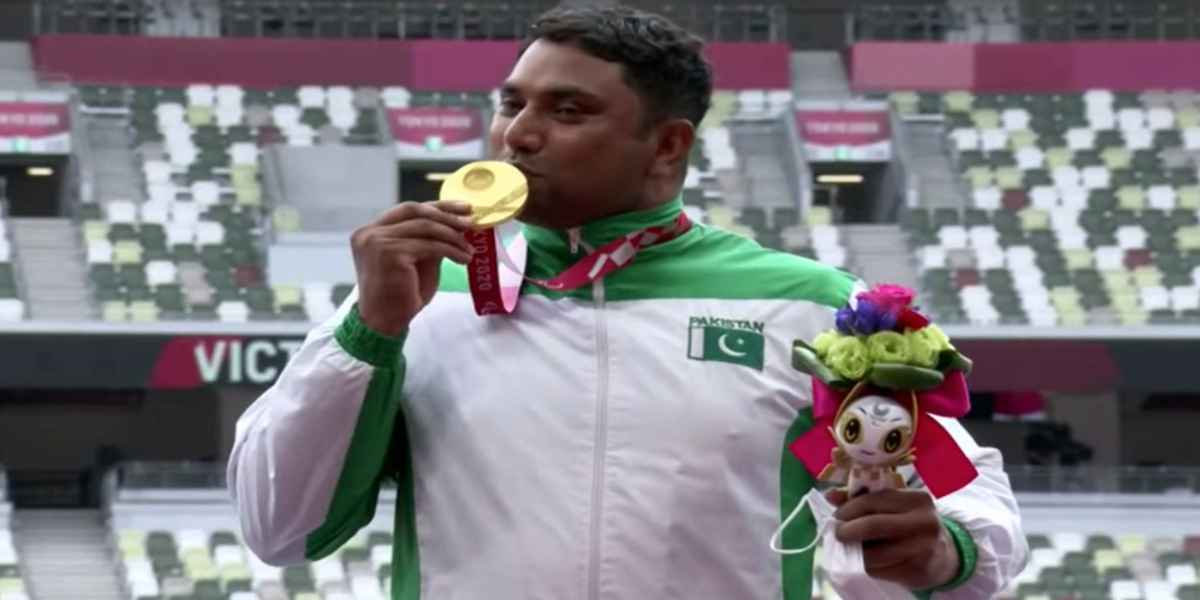
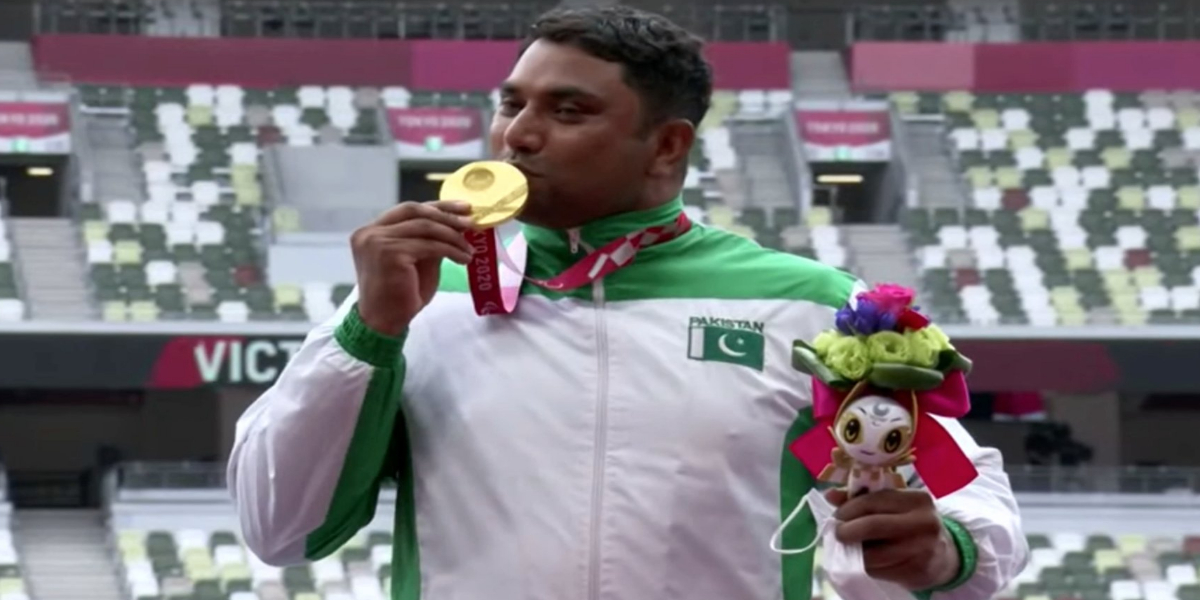

### Work in Progress

Pleae upvote this notebook if you find this useful.

### **THANK YOU**